# TØ 1

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

# Opgave 1

Bestem funktionsværdien af:
\begin{equation}
z(t) = \displaystyle\frac{1}{y_0^2(t)+y_1^2(t)}
\end{equation}
for $t = 9.95227772$, idet $y_0(t)$ og $y_1(t)$ er givet ved de koblede differentialligninger:
\begin{equation}
\begin{array}{rcl}
\displaystyle\frac{dy_0}{dt}&=&-\displaystyle\frac{1}{2}y_0 -y_1\\
&&\\
\displaystyle\frac{dy_1}{dt}&=&y_0-\displaystyle\frac{1}{2}y_1
\end{array}
\end{equation}
og startbetingelserne: $y_0(t=0)=20$ og $y_1(t=0)=-10$.

Plot endvidere $y_0(t)$, $y_1(t)$, og $z(t)$.

![Image Title](https://python23.sci2u.dk/media/4/img/coupled_I_01.png)


Final z is  41.997443843576555


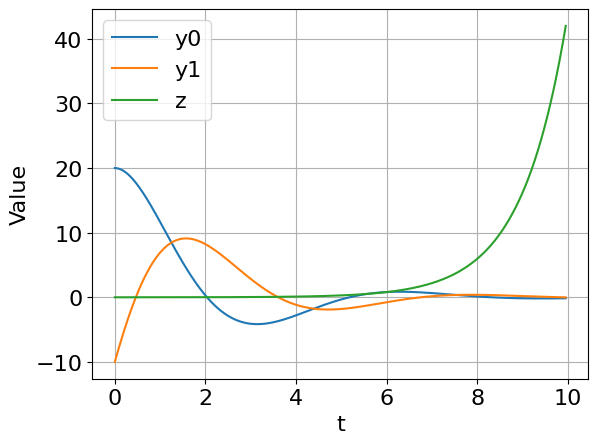

In [11]:
t_init = 0
t_end = 9.95227772

t_range = [t_init, t_end]


def f(t, y):
    y0 = y[0]
    y1 = y[1]
    dy0dt = -0.5*y0-y1
    dy1dt = y0-0.5*y1
    return [dy0dt, dy1dt]


def z(y0,y1):
    return 1/(y0**2+y1**2)

y_init = [20,-10]

solution = solve_ivp(f, t_range, y_init, t_eval=np.linspace(t_init, t_end, 1000))

fig,ax = plt.subplots()
plt.rc('font',size = 16)


ax.grid()
ax.plot(solution.t, solution.y[0], label='y0')
ax.plot(solution.t, solution.y[1], label='y1')
ax.plot(solution.t, z(solution.y[0],solution.y[1]), label='z')
print('Final z is ', z(solution.y[0][-1],solution.y[1][-1]))


ax.set_xlabel('t')
ax.set_ylabel('Value')

ax.legend()

# Opgave 2

Et objekt flyttes fra  $(0,y_0)$, til tiden  $t$=0  på en sådan måde at disse koblede differentialligninger hele tiden er opfyldt:

\begin{equation*}
\begin{array}{rcl}
\displaystyle\frac{dx}{dt}&=&\displaystyle\frac{v_p t -x}{\sqrt{(v_0 t - x)^2+y^2}}v_{obj},\\
&&\\
\displaystyle\frac{dy}{dt}&=&\displaystyle\frac{-y}{\sqrt{(v_0 t - x)^2+y^2}}v_{obj}.
\end{array}
\end{equation*}
Hvor $v_{obj}$ og $v_p$ er de konstante hastigheder af hhv objektet og af et punkt $r_p$. Sidstnævnte fremkommer som punktet, hvor tangenten til objektets bane skærer $x$-aksen.

Løs differentialligningerne og plot positionen af objektet. Benyt ækvidistante tider og observér at objektet bevæger sig lige langt ad vejen per tidsskridt.

Indsæt tangeterne.

Hint: tangenten til kurven går gennem $(x,y)$ og har hældningen,

\begin{equation*}
\displaystyle\frac{dy}{dx} = \displaystyle\frac{dy}{dt} / \displaystyle\frac{dx}{dt}
= \displaystyle\frac{-y}{v_p t -x}
\end{equation*}
Tegn kun den del af tangenterne, der går fra $(x,y)$ til skæringen med $x$-aksen. Tænk på
dem som liniestykker med bredde $\Delta x$ og højde $\Delta y$ (begge
regnet med fortegn). Det indses at alle de ønskede liniestykker har
$\Delta y = -y$, hvorved deres $\Delta x$ kan beregnes til:
\begin{equation*}
\begin{array}{rcl}
  \Delta y&=&\displaystyle\frac{dy}{dx}\Delta x\\
          &\Downarrow&\\
  -y&=&\displaystyle\frac{-y}{v_p t -x}\Delta x\\
          &\Downarrow&\\
\Delta x&=&v_p t -x
\end{array}
\end{equation*}

Tjek at tangenternes skæring med $x$-aksen fordeles ækvidistant.


![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg2.png)


Text(0, 0.5, 'y')

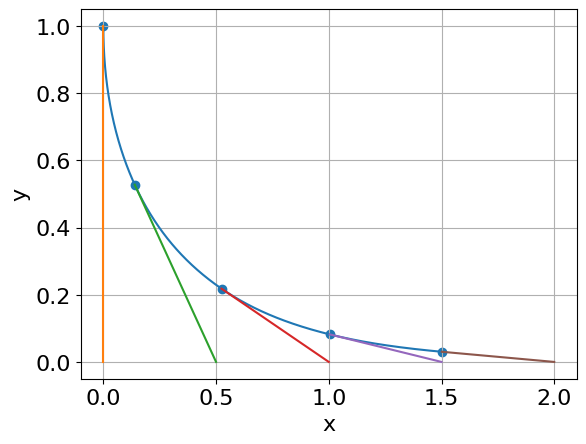

In [12]:
t_init = 0
t_end = 10


t_range = [t_init, t_end]

vPoint = 0.2
vObject  = 0.2



def f(t, v):
    x = v[0]
    y = v[1]
    dxdt = (vPoint * t - x)/(np.sqrt((vPoint*t-x)**2)+y**2) * vObject
    dydt = (-y) /(np.sqrt((vPoint*t-x)**2)+y**2) * vObject
    return [dxdt, dydt]

v_init = [0,1]

solutionMany = solve_ivp(f, t_range, v_init,t_eval = np.linspace(t_init,t_end,1000))
solutionFew =  solve_ivp(f, t_range, v_init,t_eval = np.linspace(t_init,t_end,5))

fig,ax = plt.subplots()

ax.plot(solutionMany.y[0],solutionMany.y[1])

ax.scatter(solutionFew.y[0],solutionFew.y[1])


#Now plot the tangent lines down to the x-axis:
for x,y,t in zip(solutionFew.y[0],solutionFew.y[1],solutionFew.t):
    delta_y = -y
    delta_x = vPoint*t - x
    ax.plot([x,x+delta_x],[y,y+delta_y])

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Opgave 3

Nu skal samme opgave løses, hvor der regnes vektorielt. Derfor indføres:

$\mathbf{\hat{d}}$ er en enhedsvektor i retningen fra  $\mathbf{r}$ til $\mathbf{r}_p$, som vist på denne figur:

![Image Title](https://python23.sci2u.dk/media/2/img/ode_vector_box_schematic.png)

Punktet $\mathbf{r}_p$ ligger på $x$-aksen og bevæger sig med konstant hastighed. Man kan altså skrive:

\begin{equation*}
\mathbf{r}_p = \left[\begin{array}{c}v_p\>t\\0\end{array}\right],
\end{equation*}

indsætte det i:

\begin{equation*}
\mathbf{d} = \mathbf{r}_p - \mathbf{r},
\end{equation*}

og få enhedsvektoren med:

\begin{equation*}
\mathbf{\hat{d}} = \frac{\mathbf{d}}{\left|\mathbf{d}\right|}.
\end{equation*}



Gentag nu opgave 2 men med denne vektorielle differentialligning:
\begin{equation*}
\frac{d}{dt}\mathbf{r} = v_{obj}\>\mathbf{\hat{d}},
\end{equation*}
hvor $\mathbf{\hat{d}}$ er retningsvektoren indført ovenfor.

Du skal få samme figur som før.
![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg3.png)


Text(0, 0.5, 'y')

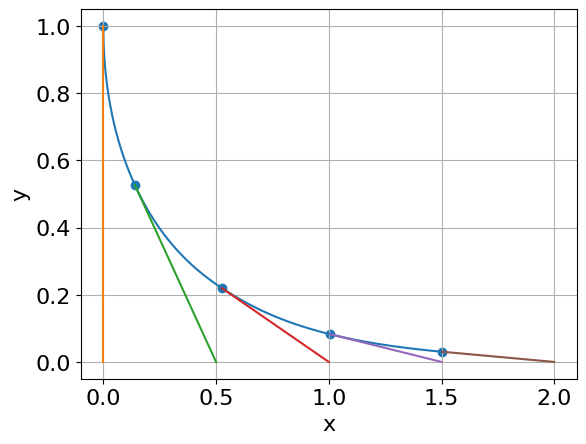

In [13]:
v0 = np.array([0,1])

def f(t, v):
    rPoint = np.array([vPoint*t,0])
    d = rPoint - v
    d_hat = d / np.linalg.norm(d)
    return vObject * d_hat

solutionManyV = solve_ivp(f, t_range, v0, t_eval=np.linspace(t_init, t_end, 1000))
solutionFewV = solve_ivp(f, t_range, v0, t_eval=np.linspace(t_init, t_end, 5))
fig,ax = plt.subplots()


ax.grid()
ax.plot(solutionManyV.y[0],solutionManyV.y[1])
ax.scatter(solutionFewV.y[0],solutionFewV.y[1])

for x,y,t in zip(solutionFewV.y[0],solutionFewV.y[1],solutionFewV.t):
    delta_y = -y
    delta_x = vPoint*t - x
    ax.plot([x,x+delta_x],[y,y+delta_y])

ax.set_xlabel('x')
ax.set_ylabel('y')

# Opgave 4

Et objekt flyttes stadigt fra $(0,y_0)$, til tiden  $t$=0, men nu ændres hastighedskomposanterne så i stedet disse koblede differentialligninger er opfyldt:

\begin{equation*}
\begin{array}{rcl}
\displaystyle\frac{dx}{dt}&=&\displaystyle\frac{y_0^2-y^2}{y_0^2}v_p,\\
&&\\
\displaystyle\frac{dy}{dt}&=&-\displaystyle\frac{y\sqrt{y_0^2-y^2}}{y_0^2}v_p.
\end{array}
\end{equation*}
Nu er $v_p$ den konstante hastighed af punktet på $x$-aksen, hvor
tangenten rammer. Benyt $v_p=0.1$.

Vigtigt hint: Da såvel $\displaystyle\frac{dx}{dt}$ som
$\displaystyle\frac{dy}{dt}$ giver nul for begyndelsesbetingelsen skal
man ændre denne en lille smule for at få integrationen med
`solve_ivp` til at begynde.
Benyt derfor $(0,2-10^{-6})$ som begyndelsesbetingelse.

Nu er de markerede positioner langs vejen ikke længere
ækvidistante. Det er punkterne som tangenterne rammer på $x$-aksen til
gengæld og alle tangent-liniestykker er nu lige lange:

![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg4.png)

Vejen som objektet gennemløber kaldes en tractrix.

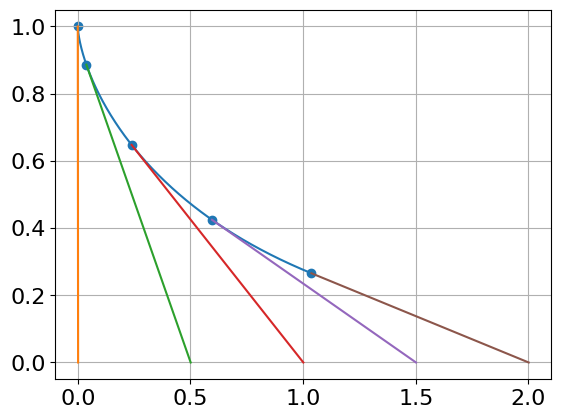

In [14]:
x0 = 0
y0 = 1

t0 = 0
t_end = 20

t_range = [t0,t_end]

vPoint = 0.1

def f(t,v):
    x = v[0]
    y = v[1]
    dxdt = (y0**2-y**2) / (y0**2) * vPoint
    dydt = -y * np.sqrt(y0**2 - y**2) / (y0**2) * vPoint
    return [dxdt,dydt]
solution = solve_ivp(f,t_range,[x0,y0-1e-6],t_eval=np.linspace(t_init,t_end,1000))
solutionFew = solve_ivp(f,t_range,[x0,y0-1e-6],t_eval=np.linspace(t_init,t_end,5))

fig,ax = plt.subplots()
ax.grid()


ax.plot(solution.y[0],solution.y[1])
ax.scatter(solutionFew.y[0],solutionFew.y[1])

for x,y,t in zip(solutionFew.y[0],solutionFew.y[1],solutionFew.t):
    delta_y = -y
    delta_x = np.sqrt(y0**2-y**2)
    ax.plot([x,x+delta_x],[y,y+delta_y])

# Opgave 5

Den sidste opgave kan også løses vektorielt. Da bliver differentialligningen:

\begin{equation*}
\frac{d}{dt}\mathbf{r} = \sqrt{1-\frac{y^2}{y_0^2}}v_p\>\mathbf{\hat{d}}
\end{equation*}

hvor $\mathbf{\hat{d}}$ har samme betydning som før. Implementér denne differentialligning og bestem løsningen.

![Image Title](https://python23.sci2u.dk/media/4/img/2025_toe1_opg5.png)

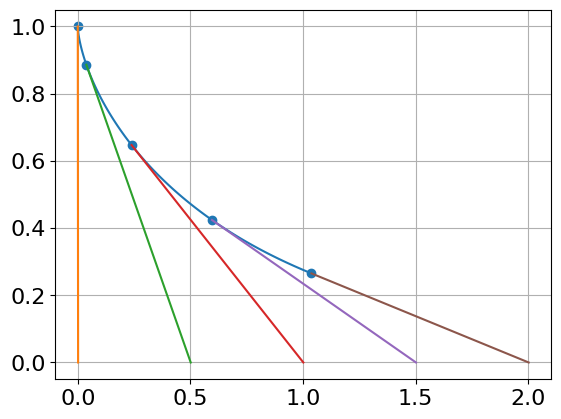

In [15]:
x0 = 0
y0 = 1

v0 = np.array([x0,y0-1e-6])

t0 = 0
t_end = 20

t_range = [t0,t_end]

vPoint = 0.1

def f(t,v):
    rPoint = np.array([vPoint*t,0])
    d = rPoint - v
    d_hat = d / np.linalg.norm(d)
    return vPoint * np.sqrt(1-v[1]**2/y0**2) *  d_hat

solutionManyV = solve_ivp(f,t_range,v0,t_eval=np.linspace(t_init,t_end,100))
solutionFewV  = solve_ivp(f,t_range,v0,t_eval=np.linspace(t_init,t_end,5))

fig,ax = plt.subplots()

ax.grid()
ax.plot(solutionManyV.y[0],solutionManyV.y[1])
ax.scatter(solutionFewV.y[0],solutionFewV.y[1])

for x,y,t in zip(solutionFewV.y[0],solutionFewV.y[1],solutionFewV.t):
    delta_y = -y
    delta_x = np.sqrt(y0**2-y**2)
    ax.plot([x,x+delta_x],[y,y+delta_y])

# Opgave 6

Animér løsningen til differentialligningen

Tænk evt på at det er en kasse i $\mathbf{r}$ som trækkes i en stram snor af en person i $\mathbf{r}_h$.

<img src="https://mldft.com/media/1/img/TO-F_fig2.gif" alt="Description of your image" style="width:80%">

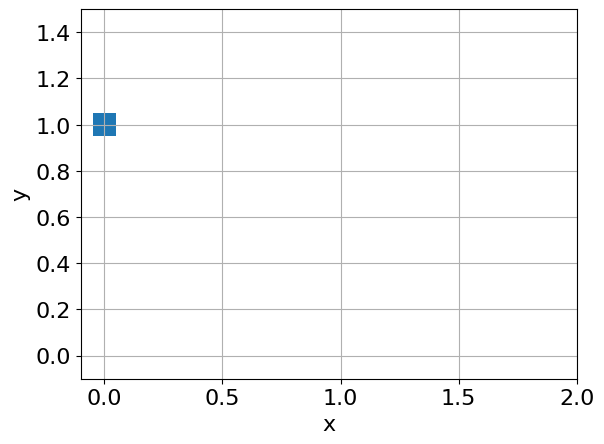

In [77]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
# ax.plot(solutionManyV.y[0], solutionManyV.y[1],'k--')
dotR, = ax.plot([], [], 'ro',label = 'Point')
kLine, = ax.plot([],[],'k-')
pathTrail, = ax.plot([],[],'k--')
ax.grid()


dotRX = vPoint * solutionManyV.t
dotRY = np.zeros_like(dotRX)

dotBX = solutionManyV.y[0]
dotBY = solutionManyV.y[1]

patchWidth = 0.1
patchHeight = patchWidth
patch = patches.Rectangle((dotBX[0]-0.5*patchWidth,dotBY[0]-0.5*patchHeight),patchWidth,patchHeight,fill=True,label = 'Object',rotation_point='center')

def init():
    dotR.set_data([], [])
    kLine.set_data([],[])
    ax.add_patch(patch)
    pathTrail.set_data([],[])
    return dotR,kLine,patch,pathTrail

def update(frame):
    dotR.set_data(dotRX[frame], dotRY[frame])
    kLine.set_data([dotRX[frame],dotBX[frame]],[dotRY[frame],dotBY[frame]]) 
    patch.set_xy([dotBX[frame]-0.5*patchWidth,dotBY[frame]-0.5*patchHeight])
    pathTrail.set_data(dotBX[:frame],dotBY[:frame])
    patch.set_angle(np.rad2deg(np.arctan2(dotBY[frame]-dotRY[frame],dotBX[frame]-dotRX[frame])))
    # print(np.rad2deg(np.arctan2(dotBY[frame]-dotRY[frame],dotBX[frame]-dotRX[frame])))
    return dotR,kLine,patch,pathTrail

ani = FuncAnimation(fig, update, frames=len(solutionManyV.y[0]), init_func=init, blit=True, interval=20)
ax.set_ylim(-0.1,1.5)
ax.set_xlim(-0.1,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



from IPython.display import HTML


In [78]:
HTML(ani.to_jshtml())

C:\Users\au581149\AppData\Local\Temp\ipykernel_15996\4271065725.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dotR.set_data(dotRX[frame], dotRY[frame])
